<a href="https://colab.research.google.com/github/zubrist/Machine-Learning/blob/main/Q4_Naive_Bayes_(Covid_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [ ]:
#import dataset
df=pd.read_csv('/content/drive/MyDrive/dataset/covid19_fake.csv')
df

,ID,Fever,Cough,Breathing issues,Infected
0,1,NO,NO,NO,NO
1,2,YES,YES,YES,YES
2,3,YES,YES,NO,NO
3,4,YES,NO,YES,YES
4,5,YES,YES,YES,YES
5,6,NO,YES,NO,NO
6,7,YES,NO,YES,YES
7,8,YES,NO,YES,YES
8,9,NO,YES,YES,YES
9,10,YES,YES,NO,YES


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                14 non-null     int64 
 1   Fever             14 non-null     object
 2   Cough             14 non-null     object
 3   Breathing issues  14 non-null     object
 4   Infected          14 non-null     object
dtypes: int64(1), object(4)
memory usage: 688.0+ bytes


**Check for null values**

In [ ]:
df.isnull().sum()

ID                  0
Fever               0
Cough               0
Breathing issues    0
Infected            0
dtype: int64

**View the shape**

In [ ]:
print("There are {} rows and {} columns.".format(df.shape[0],df.shape[1]))

There are 14 rows and 5 columns.


View the statistical description of the data frame

In [ ]:
df.describe()

,ID
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


In [ ]:
df['Infected'].value_counts()

YES    8
NO     6
Name: Infected, dtype: int64

**Visualizations**

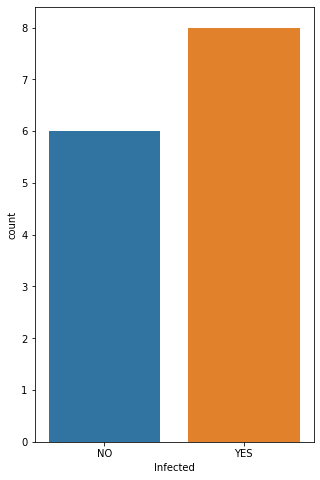

In [ ]:
plt.figure(figsize=(5,8));
sns.countplot(df['Infected']);

In [ ]:
# Assigning features and label variables
Fever=['No','Yes','Yes','Yes','Yes','No','Yes','Yes','No','Yes','No','No','No','Yes']
Cough=['No','Yes','Yes','No','Yes','Yes','No','No','Yes','Yes','Yes','Yes','Yes','Yes']
Breathin_issue=['No','Yes','No','Yes','Yes','No','Yes','Yes','Yes','No','No','Yes','Yes','No' ]
Infected=['No','Yes','No','Yes','Yes','No','Yes','Yes','Yes','Yes','No','Yes','No','No']


In [ ]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
fever_encoded=le.fit_transform(Fever)
caugh_encoded=le.fit_transform(Cough)
breathing_encoded=le.fit_transform(Breathin_issue)
target=le.fit_transform(Infected)

In [ ]:
print(fever_encoded)
print(caugh_encoded)
print(breathing_encoded)
print(target)

[0 1 1 1 1 0 1 1 0 1 0 0 0 1]
[0 1 1 0 1 1 0 0 1 1 1 1 1 1]
[0 1 0 1 1 0 1 1 1 0 0 1 1 0]
[0 1 0 1 1 0 1 1 1 1 0 1 0 0]


In [ ]:
import numpy as np
zipped=zip(fever_encoded,caugh_encoded,breathing_encoded)
features = np.array(list(zipped)).tolist()
print(features)

[[0, 0, 0], [1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 1, 1], [0, 1, 0], [1, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 0], [0, 1, 0], [0, 1, 1], [0, 1, 1], [1, 1, 0]]


**Builing the model**

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import CategoricalNB

In [ ]:
#Create a Gaussian Classifier
model = CategoricalNB()

In [ ]:
# Train the model using the training sets
model.fit(features,target)

CategoricalNB()

In [ ]:
#Predict Output
predicted= model.predict([[0, 1,1]]) # 0:No Feevr, 1:Has Caugh , 1:Has Breathing Problem
print("Predicted Value:", predicted)

Predicted Value: [1]
